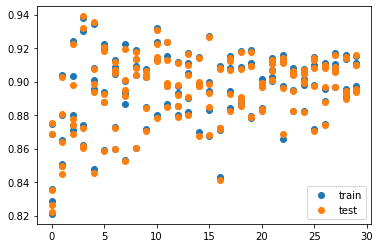

In [45]:
import glob
import numpy as np
import os
import re
import matplotlib.pyplot as plt

base_directory = "C:\\Users\\Zach\\Desktop\\evaluation"

ssims = np.zeros([30,5,2,19])
for epoch_i in range(30):
    for train_i, train_test in enumerate(["train", "test"]):
        
        file_path = os.path.join(base_directory,"epoch_" + str(epoch_i),train_test + ".txt")
        with open(file_path, "r") as f:
            f.readline() # blank line at begining of file
            for i in range(5): # five xvals
                raw_data = ""
                for ii in range(4): # each array spans four lines
                    raw_data += f.readline()
                
                processed_data = re.sub(r'[ \n\]\[]+', ',', raw_data)
                try:
                    data = np.asarray(processed_data[1:-1].split(","), float)
                    ssims[epoch_i,i,train_i,:] = data
                except:
                    pass

avg_ssims = np.mean(ssims,3)

x = np.repeat([range(30)],5,0)
x = np.transpose(x)
y_train = avg_ssims[:,:,0]
y_train[y_train == 0] = np.nan
y_test = avg_ssims[:,:,1]
y_test[y_test == 0] = np.nan

plt.scatter(x[:],y_train[:])
plt.scatter(x[:],y_test[:])
plt.legend(["train", "test"], loc="lower right")

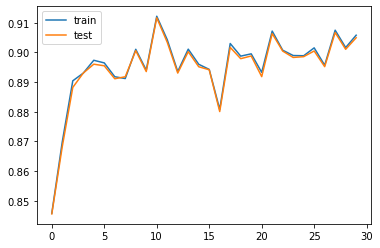

In [42]:
avg_avg_ssims = np.squeeze(np.mean(avg_ssims,1))

plt.plot(range(30),avg_avg_ssims[:,0])
plt.plot(range(30),avg_avg_ssims[:,1])
plt.legend(["train", "test"])